# Upload Dataset

In [13]:
from SCRIPTS.A_data_collection import make_dataset_for_regression
#The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
X, y = make_dataset_for_regression(n_samples=1000, n_features=8, n_informative=4, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023)
print(X.shape)
print(y.shape)

(1000, 8)
(1000,)


# Data analysis
Try to understand duplicates, range of values, functional dependencies

In [14]:
import pandas as pd

df = pd.DataFrame(X)
print(df.head())

          0         1         2         3         4         5         6  \
0 -0.875526 -0.802286  0.344298  0.092782  0.359617 -0.522146  0.344346   
1  0.017687  0.232033 -0.064917  0.520539  0.823065  0.386441  1.164699   
2 -1.008146  0.829535  1.390293 -0.124179  2.026699 -0.652941  1.651940   
3 -0.262184 -0.066307 -0.073352  0.001093 -0.362546 -1.166000  0.089148   
4 -0.978441 -0.681939 -0.575076  0.257593 -0.149306 -0.935691 -1.061089   

          7  
0  1.764987  
1 -0.429152  
2  0.240933  
3  0.971170  
4  0.181194  


In [15]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
dtype: object

### Single column analysis

In [16]:
distinct_values=df[0].nunique()
print(distinct_values)

1000


In [17]:
mean_values = df.mean()
std_values = df.std()

print("Mean values:")
print(mean_values)

print("Standard deviation values:")
print(std_values)


Mean values:
0   -0.018376
1    0.002726
2    0.012670
3   -0.032926
4    0.007471
5    0.045472
6    0.022878
7   -0.062394
dtype: float64
Standard deviation values:
0    0.986654
1    0.993410
2    1.010260
3    0.988342
4    0.962809
5    1.033102
6    0.976195
7    1.001295
dtype: float64


Create a function that changes at random the feature type with boolean or numeric values

In [18]:
import random

# List of names
names = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack']

# List of surnames
surnames = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor']

# Randomly select 10 elements from the names list
random_names = random.sample(names, 10)

# Randomly select 10 elements from the surnames list
random_surnames = random.sample(surnames, 10)

print(random_names)
print(random_surnames)

['Alice', 'Bob', 'Charlie', 'Grace', 'David', 'Eve', 'Henry', 'Jack', 'Frank', 'Ivy']
['Moore', 'Williams', 'Wilson', 'Jones', 'Taylor', 'Johnson', 'Smith', 'Miller', 'Davis', 'Brown']


In [19]:
import pandas as pd
import numpy as np

def inject_variable_type_issue(dataset, percentage):
    # Copy the dataset to avoid modifying the original
    polluted_dataset = dataset.copy()

    # Determine the number of features to be affected
    num_features_affected = int(len(dataset.columns) * percentage)

    # Generate random indices to select features to be affected
    random_indices = np.random.choice(len(dataset.columns), num_features_affected, replace=False)

    for idx in random_indices:
        column_name = dataset.columns[idx]
        #if data_type == 'numeric':
        if np.issubdtype(dataset[column_name].dtype, np.number):
            # Convert numeric feature to categorical or boolean
            prob= np.random.rand()
            if prob < 0.2:
                polluted_dataset[column_name] = np.random.choice(['red', 'green', 'blue'], size=len(dataset))
            elif prob < 0.4:
                polluted_dataset[column_name] = np.random.choice([True, False], size=len(dataset))
            elif prob < 0.6:
                polluted_dataset[column_name] = np.random.choice(random_names, size=len(dataset))
            elif prob < 0.8:
                polluted_dataset[column_name] = np.random.choice(10, size=len(dataset))
            else:
                polluted_dataset[column_name] = np.random.choice(random_surnames, size=len(dataset))

    return polluted_dataset

polluted_dataset = inject_variable_type_issue(df, 0.5)
print(polluted_dataset.head())

          0      1         2         3         4        5        6        7
0 -0.875526   True  0.344298  0.092782  0.359617    Grace    David    Jones
1  0.017687   True -0.064917  0.520539  0.823065    Henry    Frank   Wilson
2 -1.008146  False  1.390293 -0.124179  2.026699      Ivy  Charlie  Johnson
3 -0.262184  False -0.073352  0.001093 -0.362546    Henry    Henry    Moore
4 -0.978441  False -0.575076  0.257593 -0.149306  Charlie    Frank    Davis


## Statistics of the polluted dataset

In [20]:
for idx in range(len(polluted_dataset.columns)):
    print(polluted_dataset[idx].value_counts())
    distinct_values = (polluted_dataset[idx].nunique())
    print(distinct_values)
    if distinct_values < 15:
        print(polluted_dataset[idx].value_counts())
    else:
        print("Too many distinct values to print")
    uniqueness = distinct_values / len(polluted_dataset)
    print("Uniqueness: ", uniqueness)
    print ('min:', polluted_dataset[idx].min())
    print ('max:', polluted_dataset[idx].max())
    print ('mode:', polluted_dataset[idx].mode()[0])

0
-0.875526    1
 0.699665    1
 0.526995    1
-1.624549    1
 0.360607    1
            ..
 0.495590    1
-1.970448    1
-0.181868    1
 0.971282    1
 1.194620    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -3.2800447555161654
max: 3.4570878539816565
mode: -3.2800447555161654
1
True     508
False    492
Name: count, dtype: int64
2
1
True     508
False    492
Name: count, dtype: int64
Uniqueness:  0.002
min: False
max: True
mode: True
2
 0.344298    1
 0.126621    1
-0.071784    1
-0.133985    1
-1.442699    1
            ..
-0.237585    1
 1.823996    1
 2.560002    1
-0.451298    1
 0.135767    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -3.283116018399808
max: 3.316958086114071
mode: -3.283116018399808
3
 0.092782    1
-2.225401    1
 0.812451    1
-1.418133    1
-0.024437    1
            ..
-0.031640    1
-0.973715    1
 1.736388    1
 0.838680    1
-0.744550    1

In [21]:
#import libraries and set up
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

1
True     508
False    492
Name: count, dtype: int64


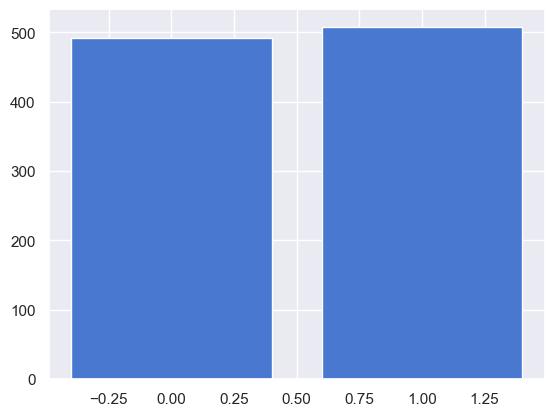

5
Henry      113
Frank      108
Grace      107
Bob        106
Ivy        102
Charlie     98
David       98
Jack        97
Alice       86
Eve         85
Name: count, dtype: int64


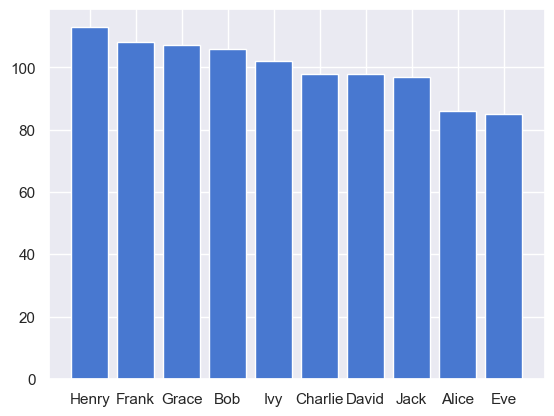

6
David      111
Frank      111
Alice      105
Grace      104
Bob        101
Charlie    100
Eve        100
Henry       91
Ivy         91
Jack        86
Name: count, dtype: int64


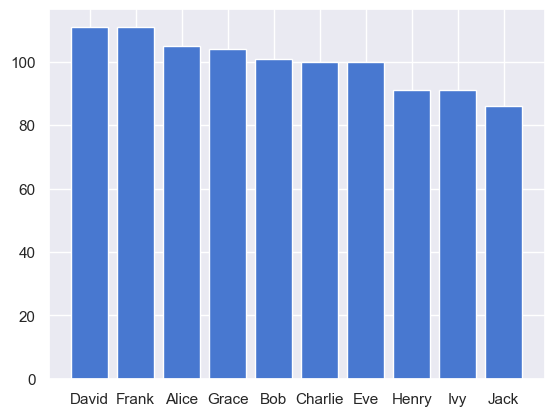

7
Jones       106
Johnson     104
Moore       104
Smith       103
Williams    102
Davis       100
Miller       97
Taylor       96
Brown        95
Wilson       93
Name: count, dtype: int64


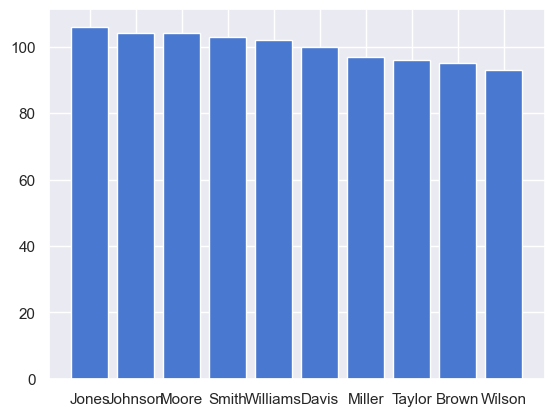

In [22]:
import matplotlib.pyplot as plt

# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if not np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        # Get the counts of each unique value in the column
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a bar plot of the counts
        plt.bar(value_counts.index, value_counts.values)

        # Show the plot
        plt.show()


0
-0.875526    1
 0.699665    1
 0.526995    1
-1.624549    1
 0.360607    1
            ..
 0.495590    1
-1.970448    1
-0.181868    1
 0.971282    1
 1.194620    1
Name: count, Length: 1000, dtype: int64
2
 0.344298    1
 0.126621    1
-0.071784    1
-0.133985    1
-1.442699    1
            ..
-0.237585    1
 1.823996    1
 2.560002    1
-0.451298    1
 0.135767    1
Name: count, Length: 1000, dtype: int64
3
 0.092782    1
-2.225401    1
 0.812451    1
-1.418133    1
-0.024437    1
            ..
-0.031640    1
-0.973715    1
 1.736388    1
 0.838680    1
-0.744550    1
Name: count, Length: 1000, dtype: int64
4
 0.359617    1
-0.121567    1
 0.105900    1
-0.341333    1
 0.337082    1
            ..
 0.554739    1
-0.657428    1
-1.279782    1
 0.802638    1
 1.027588    1
Name: count, Length: 1000, dtype: int64


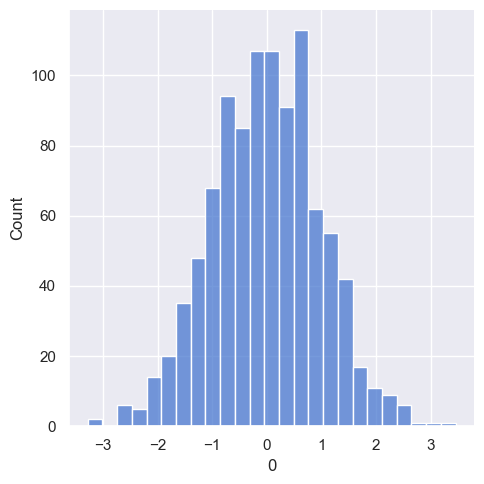

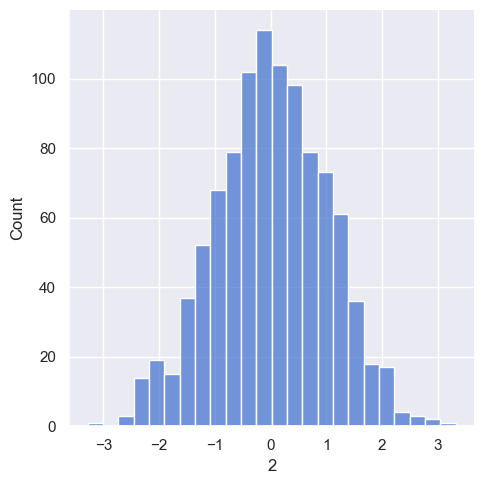

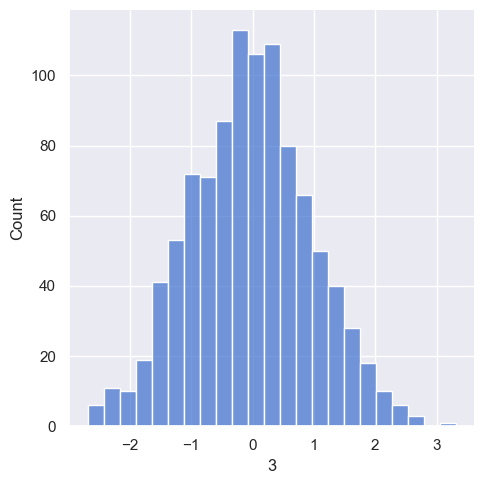

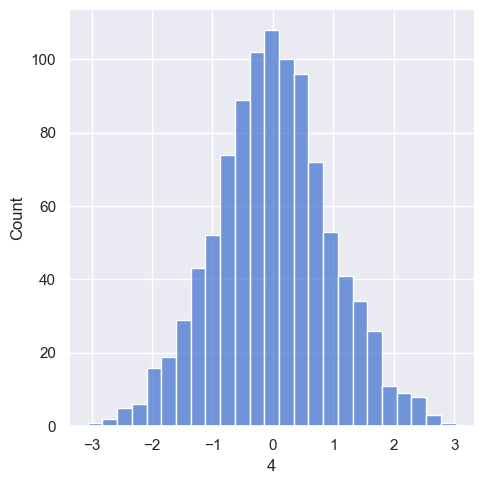

In [23]:
# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a histogram of the column values
        sns.displot(polluted_dataset[column_name])


# Regression

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for 

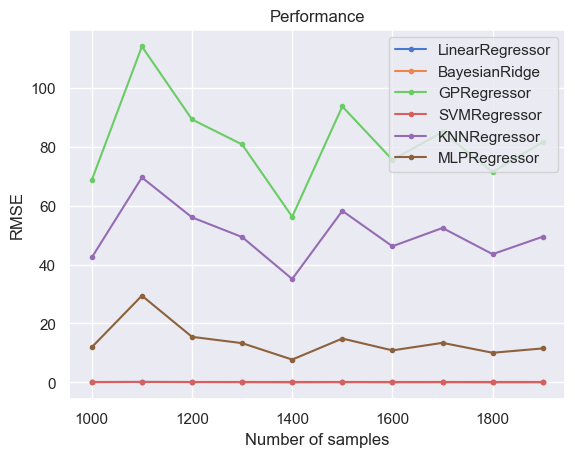

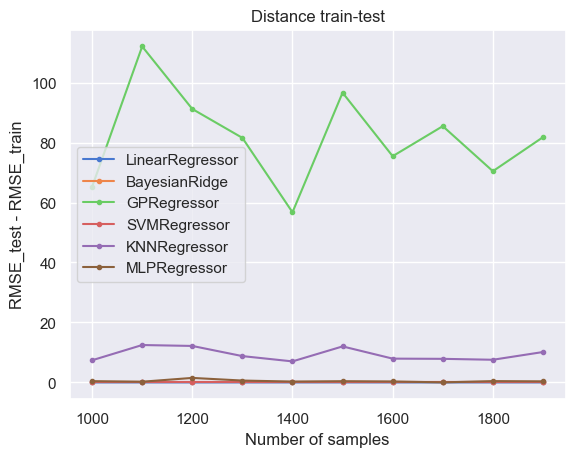

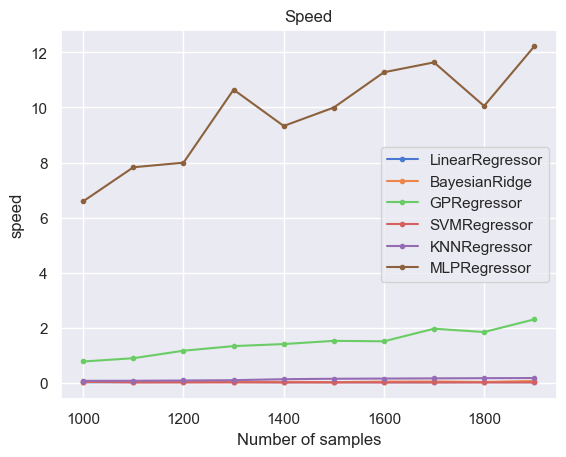

In [24]:
from SCRIPTS.D_data_analysis import regression
from SCRIPTS.E_plot_results import plot

# REGRESSION EXAMPLE
    # (in this toy example, I simply created 10 datasets with respectively 1000,1001,1002,1003,1004,1005,1006,1007,1008,1009 number of samples
    # and I generated the three plots for the evaluation of the results)
results_for_each_algorithm = []
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","GPRegressor","SVMRegressor","KNNRegressor","MLPRegressor"]
SEED = 2023
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(0,10):  # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA COLLECTION
        X, y = make_dataset_for_regression(n_samples=1000+i*100, n_features=12, n_informative=4, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023)
        # DATA POLLUTION
        df = pd.DataFrame(X)
        polluted_dataset = inject_variable_type_issue(df, 0.6)
        # DATA ANALYSIS
        results_1_analysis = regression(df, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
# EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
x_axis_values = [1000 + i * 100 for i in range(10)]
print(x_axis_values)

plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Distance train-test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")
